<a href="https://colab.research.google.com/github/choki0715/UnLiteFlowNet-PIV/blob/master/NIA_UGW_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""""
file : transformer_time_series_tf.ipynb

author : euijoong kim

copy right to aidentify Inc.

"""

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import csv

from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [2]:
!ls  gdrive/MyDrive/(지하수) 전처리, 원천데이터 통합본

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `ls  gdrive/MyDrive/(지하수) 전처리, 원천데이터 통합본'


In [26]:
# 데이터 불러오기
df = pd.read_csv('./gdrive/MyDrive/(지하수) 전처리, 원천데이터 통합본/test_음성대소_기상자료_수위pre_20220805.csv')
df.head()

,date,OBSR_DTA_VALUE,TP,ave_rain,avg_hum,hPa,sun_hr
0,2009-01-01,83.769908,-6.6,0.0,48.1,1016.4,8.6
1,2009-01-02,83.769908,-6.6,0.0,64.9,1019.6,8.5
2,2009-01-03,83.769908,-4.9,0.0,61.9,1019.5,8.5
3,2009-01-04,83.769908,-2.5,0.0,56.9,1016.9,7.4
4,2009-01-05,83.769908,-3.7,0.0,67.9,1017.2,4.2


In [28]:
# 시간항목 삭제
df=df.drop(['date'], axis=1)

df.head()

KeyError: ignored

In [34]:

# dataframe normaization
#norm_df=(df-df.mean())/df.std()
norm_df=(df-df.min())/(df.max()-df.min())
norm_df.TP[:10]

0    0.178495
1    0.178495
2    0.215054
3    0.266667
4    0.240860
5    0.223656
6    0.243011
7    0.240860
8    0.204301
9    0.165591
Name: TP, dtype: float64

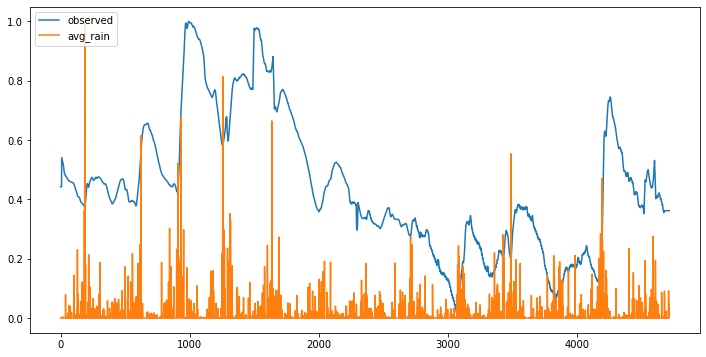

In [42]:
# plot items

# 시간축 x 값 생성 
plt.figure(figsize=(12, 6))
timesteps = list(range(0,norm_df.shape[0]))


plt.plot(timesteps, norm_df.OBSR_DTA_VALUE, label='observed')
#moving average
#plt.plot(timesteps, norm_df.ave_rain.rolling(3).mean(), label='avg_rain')
#plt.plot(timesteps, norm_df.TP.rolling(3).mean(), label='Temp')

#original
plt.plot(timesteps, norm_df.ave_rain, label='avg_rain')
#plt.plot(timesteps, norm_df.TP, label='Temp')
plt.legend(loc='upper left')
plt.show()